In [14]:
import numpy as np
import scipy.stats as sts
import requests
import os
import matplotlib.pyplot as plt

In [17]:
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
'master/MLE/data/Econ381totpts.txt')
data_file = requests.get(url, allow_redirects = True)
open('data/Econ381totpts.txt', 'wb').write(data_file.content)
pts = np.loadtxt('data/Econ381totpts.txt')
pts.min()


17.0

<IPython.core.display.Javascript object>


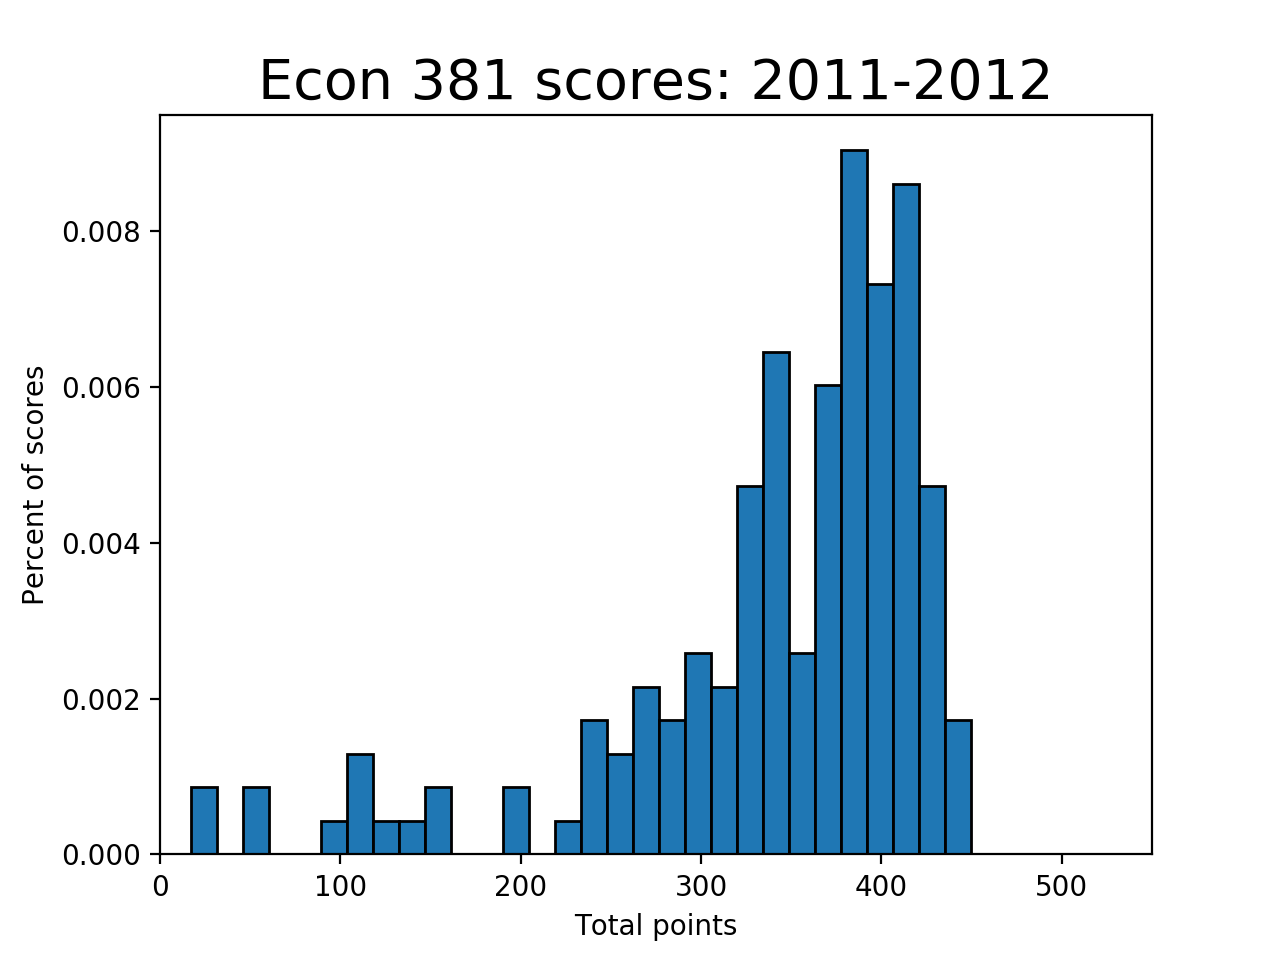

In [35]:
%matplotlib notebook
num_bins = 30
count, bins, ignored = plt.hist(pts, num_bins,density=True, edgecolor='k')
plt.title('Econ 381 scores: 2011-2012', fontsize=20)

plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])
plt.show()

In [55]:
def trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.norm.cdf(cut_ub, loc=mu, scale=sigma) -
                      sts.norm.cdf(cut_lb, loc=mu, scale=sigma))
    pdf_vals = ((1/(sigma * np.sqrt(2*np.pi)) * 
                np.exp(-(xvals - mu) **2/ (2*sigma**2)))/
               prob_notcut)
    return pdf_vals
    

<IPython.core.display.Javascript object>


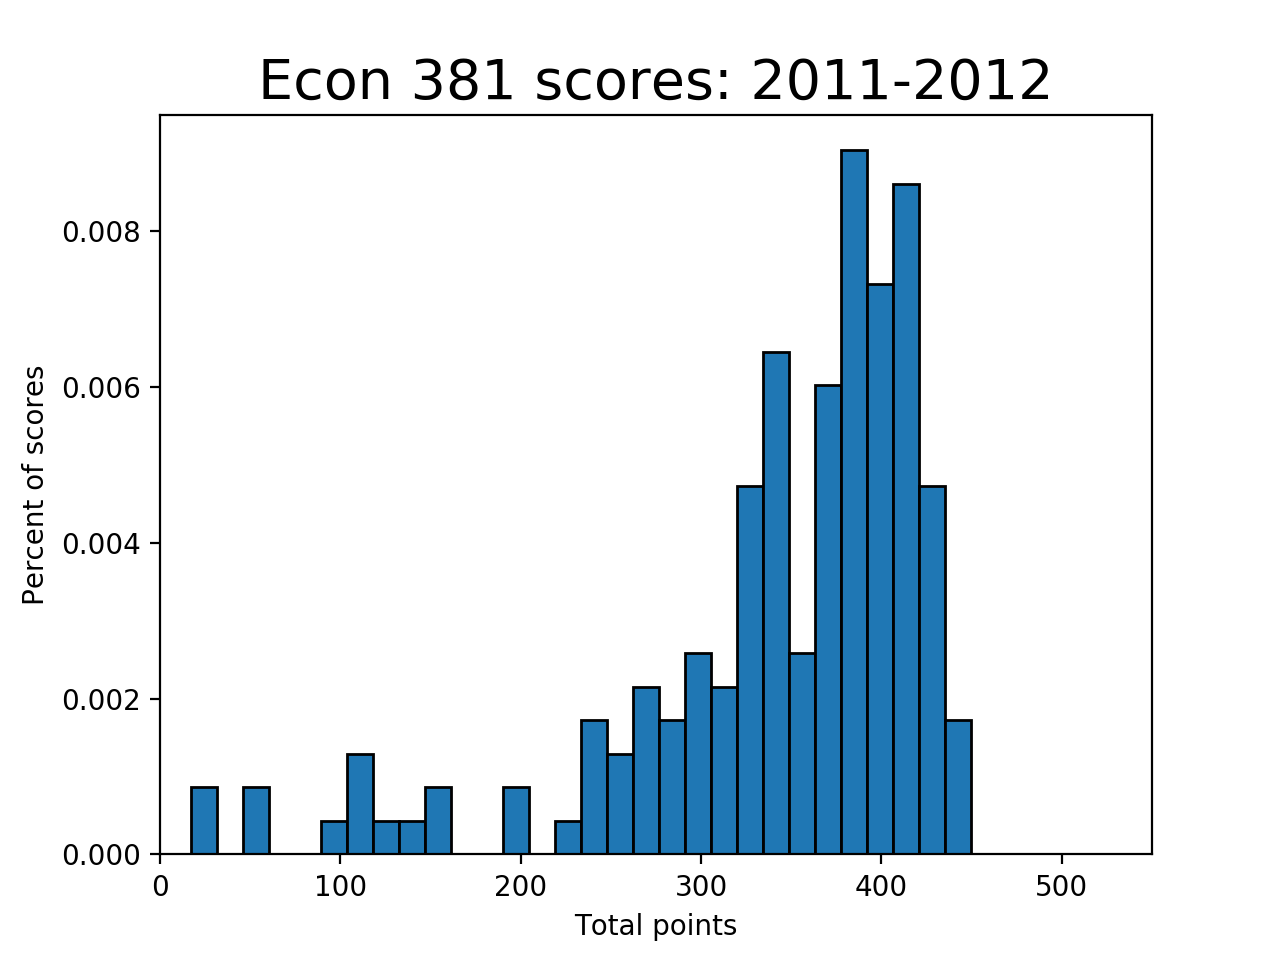

(0, 550)

In [37]:
num_bins = 30
count, bins, ignored = plt.hist(pts, num_bins, density=True,
edgecolor='k')
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550])

In [43]:
print('MEMEMEM', (count*(bins[1:]-bins[:-1])).sum())

MEMEMEM 1.0


<IPython.core.display.Javascript object>


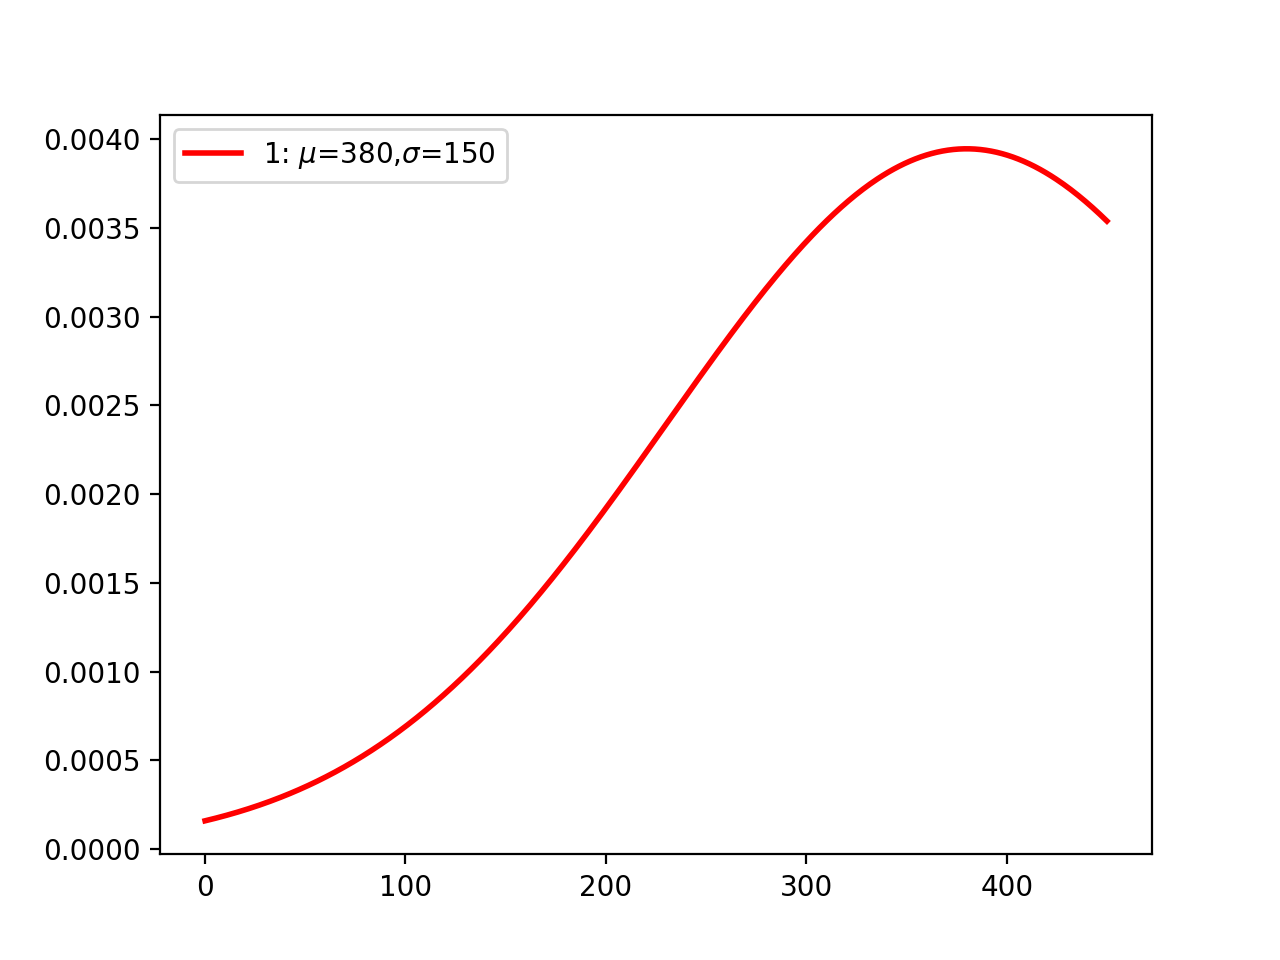

In [58]:
dist_pts = np.linspace(0, 450, 500)
mu_1 = 380
sig_1 = 150
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_1, sig_1, 0, 450),
         linewidth=2, color='r', label='1: $\mu$=380,$\sigma$=150')
plt.legend(loc='upper left')

<IPython.core.display.Javascript object>


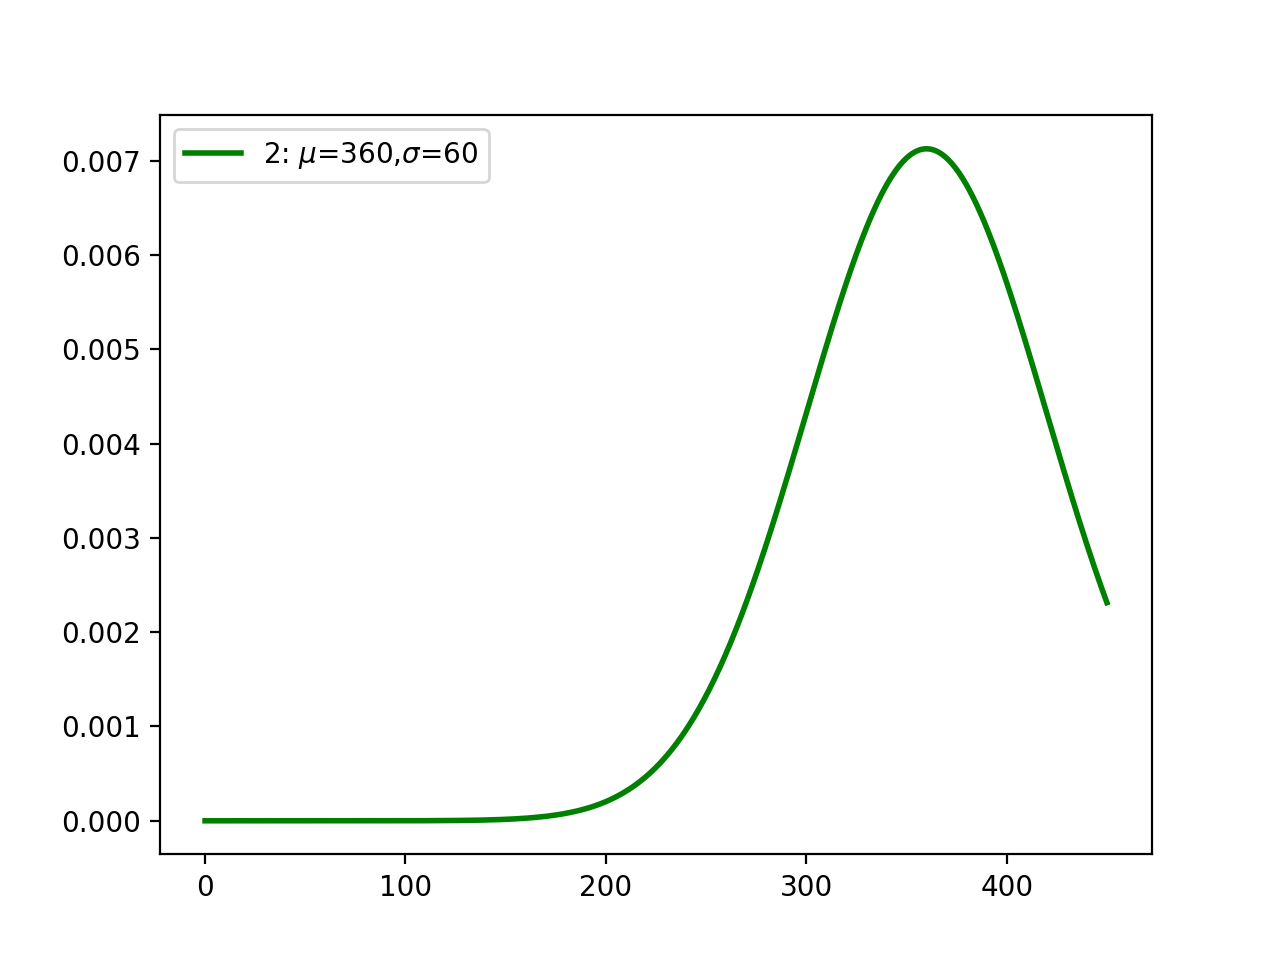

In [63]:
mu_2 = 360
sig_2 = 60
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_2, sig_2, 0, 450),
         linewidth=2, color='g', label='2: $\mu$=360,$\sigma$=60')
plt.legend(loc='upper left')

In [66]:
def log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub):
    pdf_vals = trunc_norm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val

print('Log-likelihood 1: ', log_lik_truncnorm(pts, mu_1, sig_1, 0, 450))
print('Log-likelihood 2: ', log_lik_truncnorm(pts, mu_2, sig_2, 0, 450))

Log-likelihood 1:  -924.3364498667136
Log-likelihood 2:  -978.3678854857621


In [67]:
def crit(params, *args):
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_truncnorm(xvals, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    
    return neg_log_lik_val


In [68]:
import scipy.optimize as opt

mu_init = 385 # mu_2
sig_init = 120 # sig_2
params_init = np.array([mu_init, sig_init])
mle_args = (pts, 0, 450.0)
results_uncstr = opt.minimize(crit, params_init, args=(mle_args))
mu_MLE, sig_MLE = results_uncstr.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)


mu_MLE= 622.0467628209251  sig_MLE= 198.72933067585507


In [69]:
results_uncstr

      fun: 910.5500680764064
 hess_inv: array([[8.86619091e-05, 2.39834189e-05],
       [2.39834189e-05, 4.41430499e+01]])
      jac: array([-2.28881836e-05,  7.62939453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 229
      nit: 22
     njev: 57
   status: 2
  success: False
        x: array([622.04676282, 198.72933068])

<IPython.core.display.Javascript object>


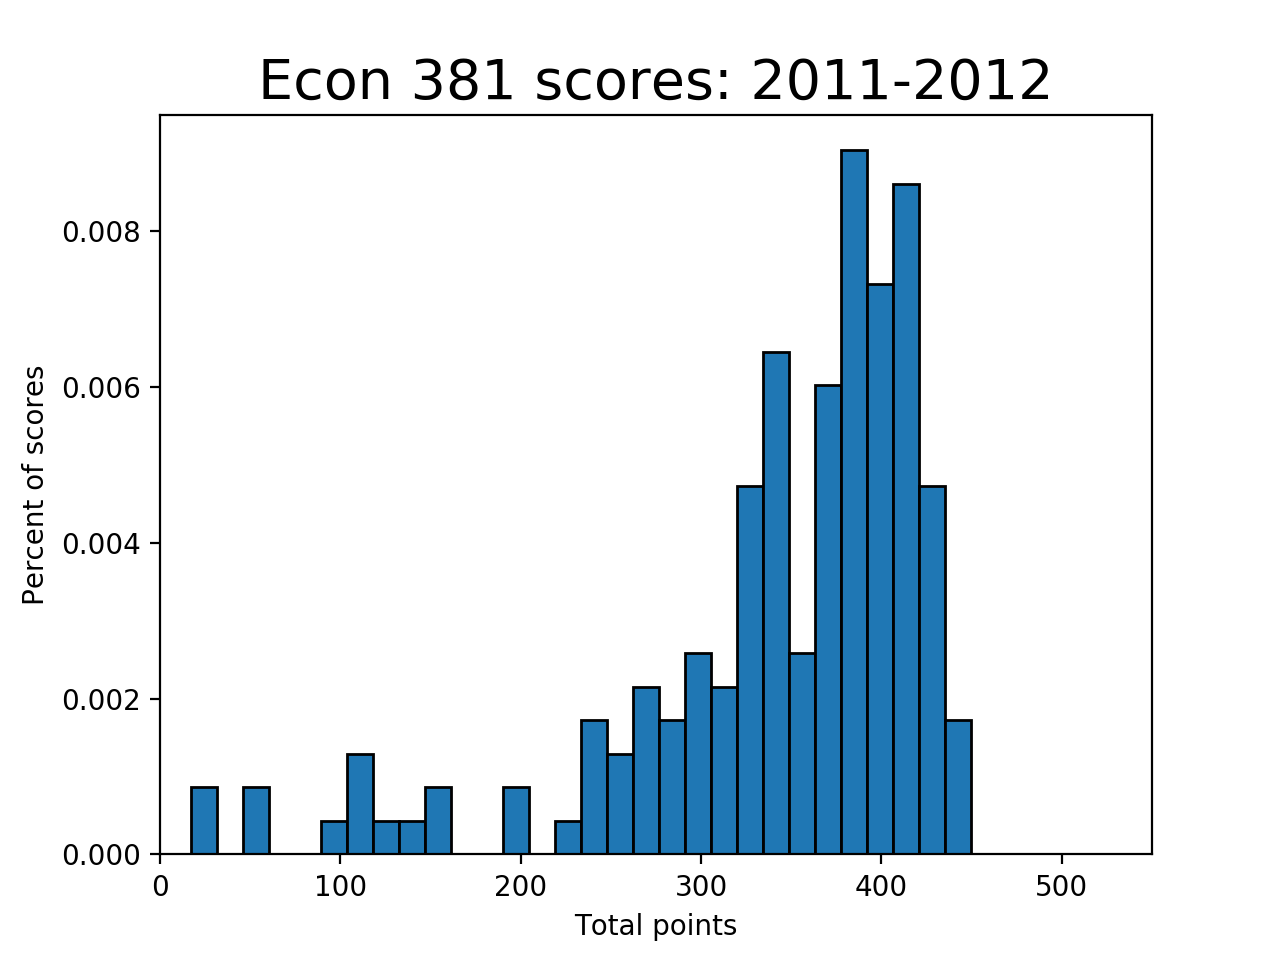

(0, 550)

In [71]:
count, bins, ignored = plt.hist(pts, num_bins, density=True,
                                edgecolor='k')
plt.title('Econ 381 scores: 2011-2012', fontsize=20)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of scores')
plt.xlim([0, 550]) # This gives the xmin and xmax to be plotted"

<IPython.core.display.Javascript object>


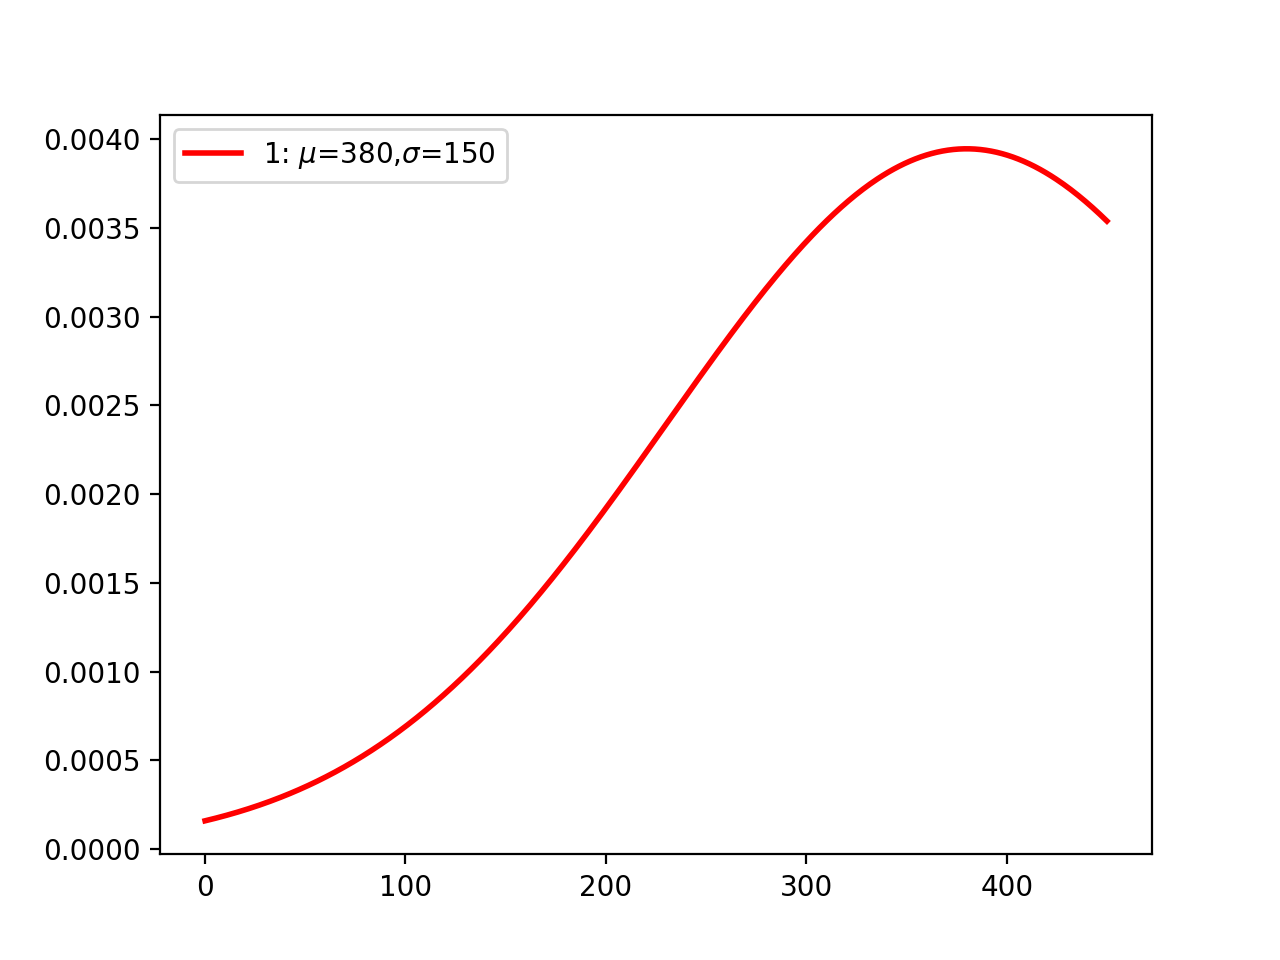

In [72]:
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_1, sig_1, 0, 450),
         linewidth=2, color='r', label='1: $\mu$=380,$\sigma$=150')
plt.legend(loc='upper left')

<IPython.core.display.Javascript object>


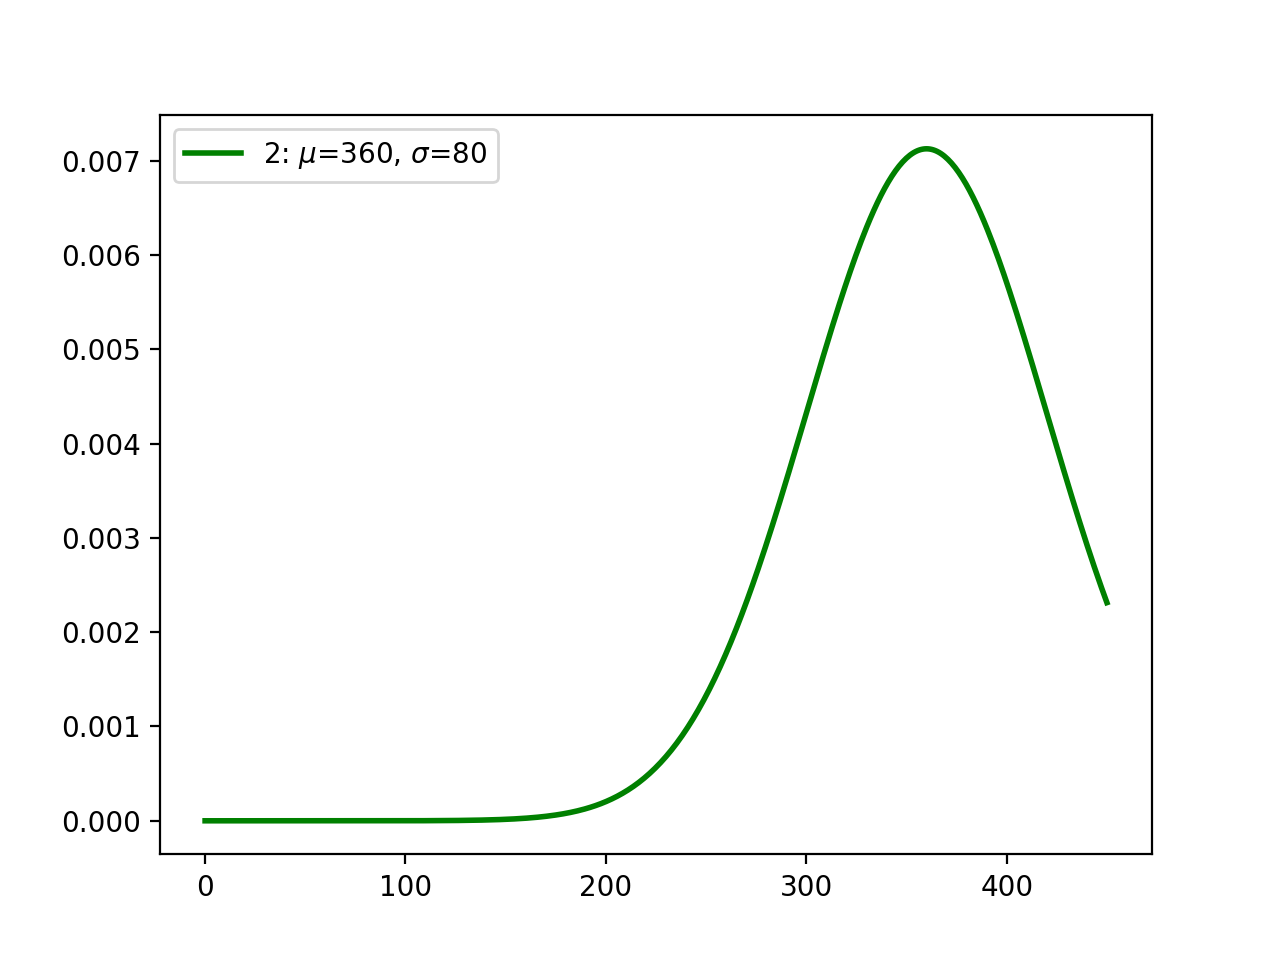

In [73]:
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_2, sig_2, 0, 450),
         linewidth=2, color='g', label='2: $\mu$=360, $\sigma$=80')
plt.legend(loc='upper left')

<IPython.core.display.Javascript object>


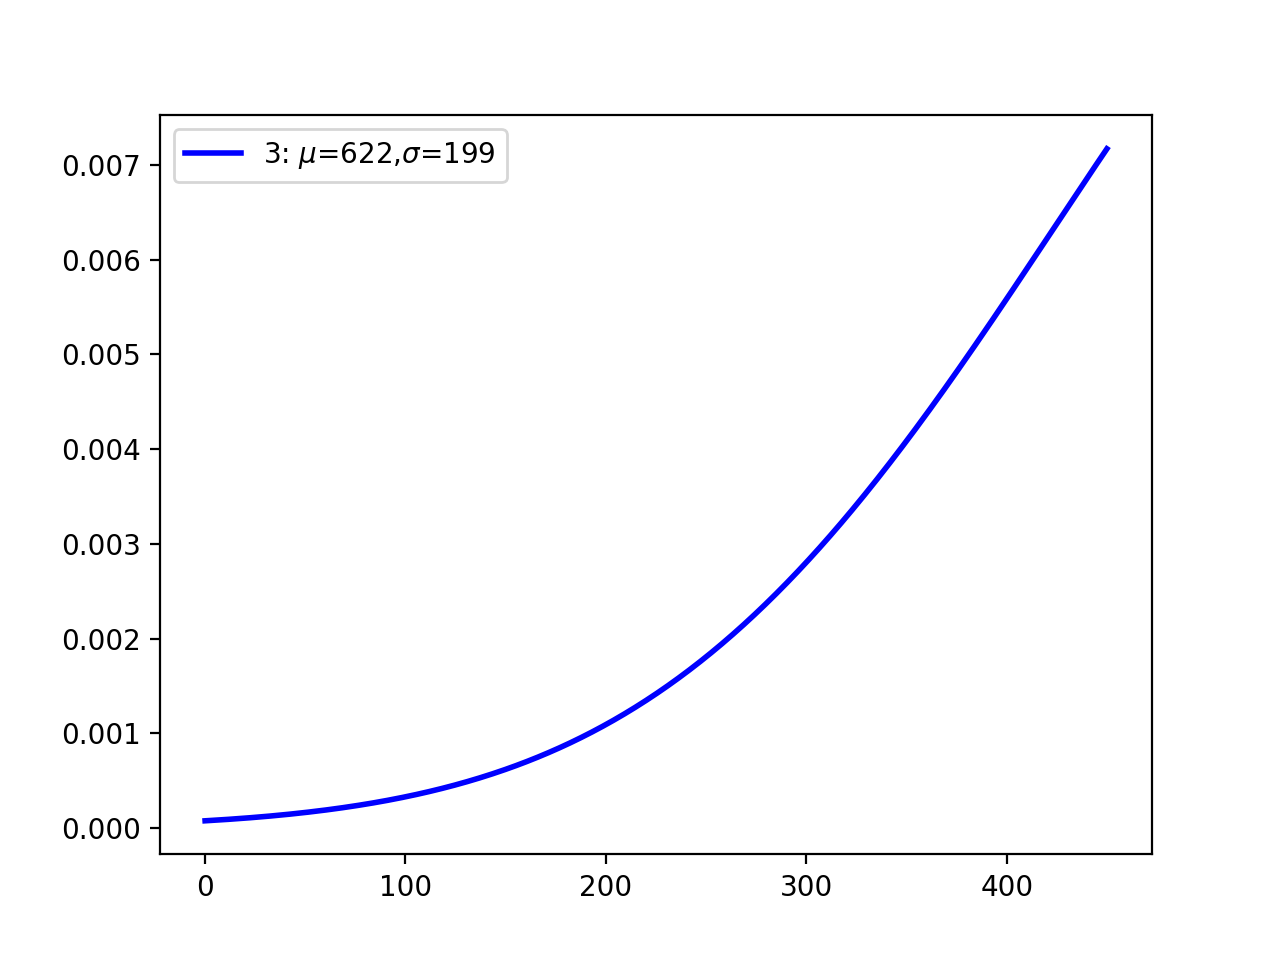

In [75]:
plt.plot(dist_pts, trunc_norm_pdf(dist_pts, mu_MLE, sig_MLE, 0, 450),
         linewidth=2, color='b', label='3: $\mu$=622,$\sigma$=199')
plt.legend(loc='upper left')

In [76]:
print('Log-likelihood 1: ', log_lik_truncnorm(pts, mu_1, sig_1, 0, 450))
print('Log-likelihood 2: ', log_lik_truncnorm(pts, mu_2, sig_2, 0, 450))
print('MLE log-likelihood 3: ', log_lik_truncnorm(pts, mu_MLE, sig_MLE,
0, 450))

Log-likelihood 1:  -924.3364498667136
Log-likelihood 2:  -978.3678854857621
MLE log-likelihood 3:  -910.5500680764064


In [77]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
cmap1 = matplotlib.cm.get_cmap('summer')

<IPython.core.display.Javascript object>


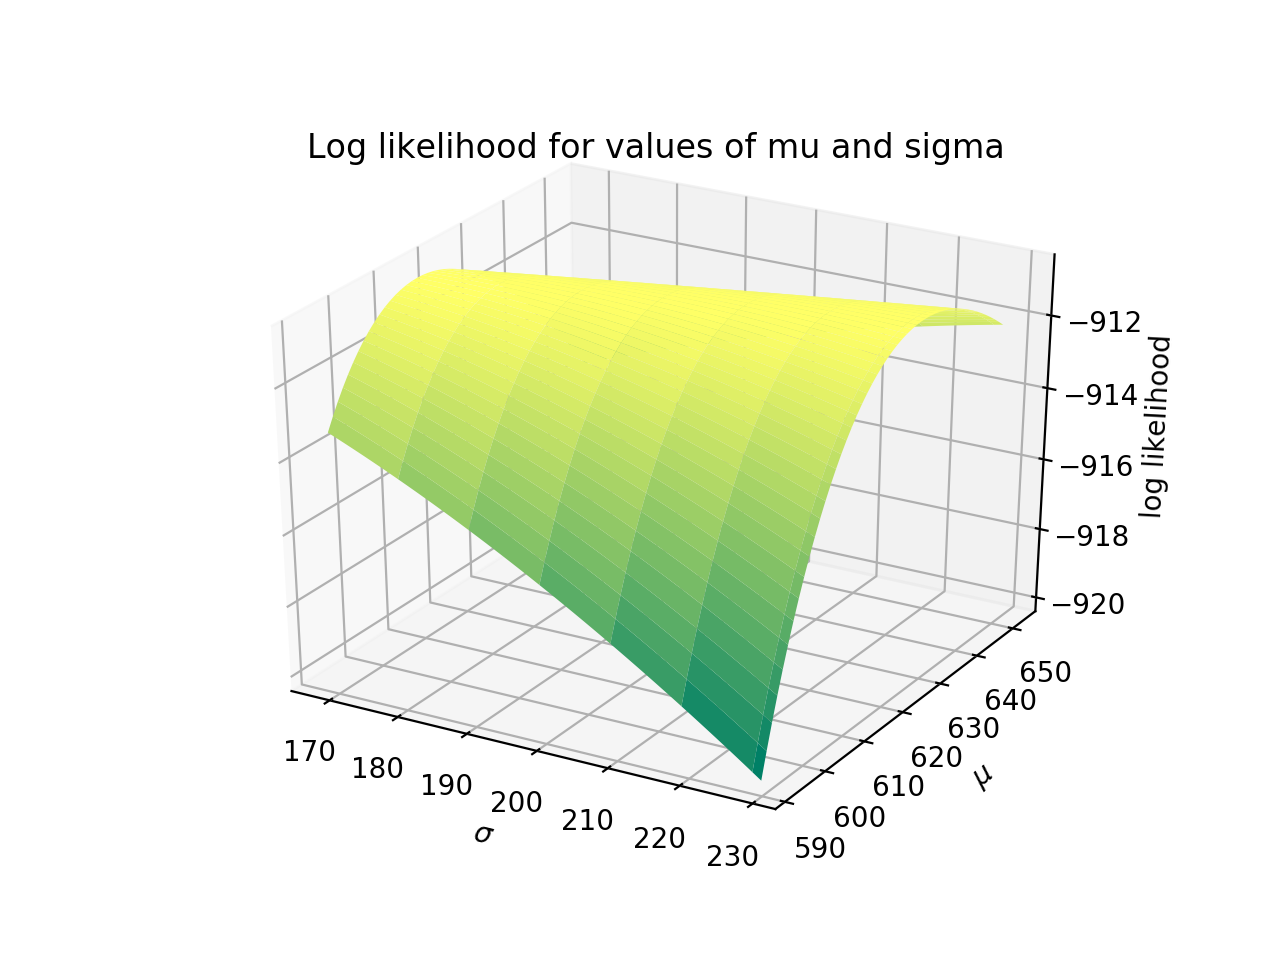

Text(0.5, 0, 'log likelihood')

In [81]:
mu_vals = np.linspace(mu_MLE - 30, mu_MLE + 30, 50)
sig_vals = np.linspace(sig_MLE- 30, sig_MLE + 30, 50)
lnlik_vals = np.zeros((50, 50))

for mu_ind in range(50):
    for sig_ind in range(50):
        lnlik_vals[mu_ind, sig_ind] = \
        log_lik_truncnorm(pts, mu_vals[mu_ind],
                          sig_vals[sig_ind], 0, 450)
        
        
mu_mesh, sig_mesh = np.meshgrid(mu_vals, sig_vals)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(sig_mesh, mu_mesh, lnlik_vals, rstride=8,
                cstride=1, cmap=cmap1)
ax.set_title('Log likelihood for values of mu and sigma')
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\mu$')
ax.set_zlabel(r'log likelihood')



In [82]:
params_init = np.array([400, 80])
results_cstr = opt.minimize(crit, params_init, args=(mle_args), method=
                            'L-BFGS-B', bounds=((350, 420), (1e-10, None)))

In [83]:
results_cstr.hess_inv.todense()

array([[230.56293071,  90.85849849],
       [ 90.85849849,  96.50720854]])

In [84]:
results_uncstr
vcv_mle = results_uncstr.hess_inv

In [85]:
stderr_mu_mle = np.sqrt(vcv_mle[0,0])
stderr_sig_mle = np.sqrt(vcv_mle[1,1])
print('VCV(MLE) = ', vcv_mle)
print('Standard error for mu estimate = ', stderr_mu_mle)
print('Standard error for sigma estimate = ', stderr_sig_mle)

VCV(MLE) =  [[8.86619091e-05 2.39834189e-05]
 [2.39834189e-05 4.41430499e+01]]
Standard error for mu estimate =  0.009416045300623482
Standard error for sigma estimate =  6.644023621191993


In [86]:
print('mu percent', stderr_mu_mle/mu_MLE)
print('sig percent', stderr_sig_mle/sig_MLE)

mu percent 1.5137198460647202e-05
sig percent 0.033432526535446226


In [87]:
lb_mu_95pctci = mu_MLE - 2 * stderr_mu_mle
print('mu_2=', mu_2, ', lower bound 95% conf. int.=', lb_mu_95pctci)



mu_2= 360 , lower bound 95% conf. int.= 622.0279307303239


In [88]:
lb_sig_95pctci = sig_MLE - 2 * stderr_sig_mle
print('sig_2=', sig_2, ', lower bound 95% conf. int.=', lb_sig_95pctci)


sig_2= 60 , lower bound 95% conf. int.= 185.44128343347109


In [89]:
mu_new, sig_new = np.array([420, 130])
print(mu_new, sig_new)
print(mu_MLE, sig_MLE)

420 130
622.0467628209251 198.72933067585507


In [90]:
log_lik_h0 = log_lik_truncnorm(pts, mu_new, sig_new, 0, 450)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_truncnorm(pts, mu_MLE, sig_MLE, 0, 450)
print('MLE log likelihood', log_lik_mle)

hypothesis value log likelihood -913.1817396241
MLE log likelihood -910.5500680764064


In [92]:
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)


likelihood ratio value 5.263343095387199


In [94]:
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

chi squared of H0 with 2 degrees of freedom p-value =  0.07195808029156547


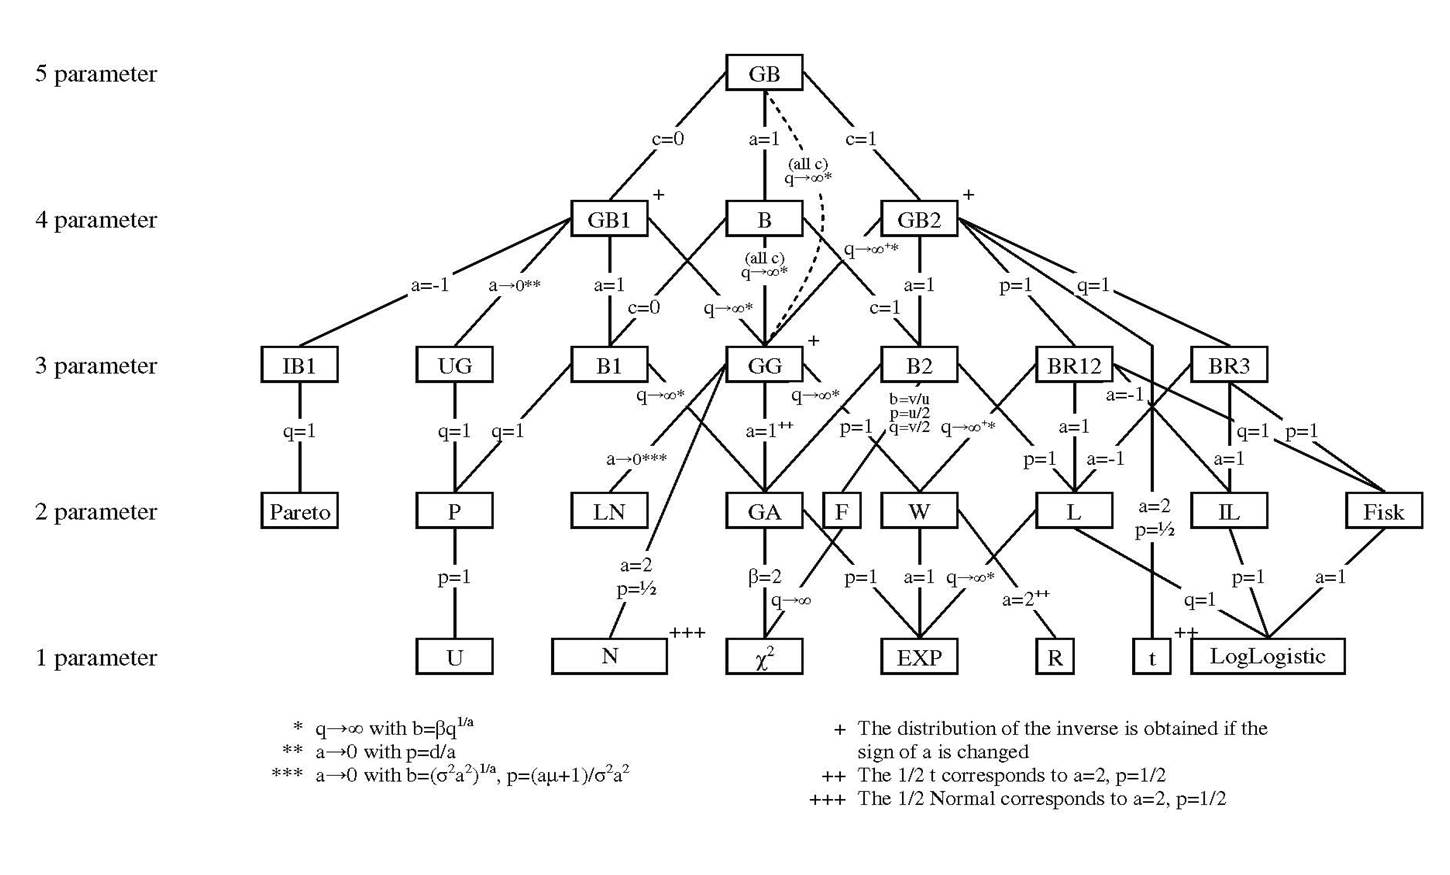

In [95]:
from IPython.display import Image
# Download and save the data file GBtree.png
url = ('https://raw.githubusercontent.com/rickecon/Notebooks/' +
'master/MLE/images/GBtree.png')
image_file = requests.get(url, allow_redirects=True)
open('images/GBtree.png', 'wb').write(image_file.content)
Image("images/GBtree.png")